In [1]:
import math
import numpy as np

# need to install packages & update jupyter
# 1. pip install ipywidgets
# 2. jupyter nbextension enable --py widgetsnbextension
# 3. restart jupyters
import matplotlib
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Position of Concentrated Liuiqidity Pool

일반적인 DEX와 다르게, Concentrated Liquidity Pool에서는 **가격 범위**를 지정해 유동성을 공급할 수 있습니다. 

![](https://2371548904-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2Fo5oaAPNdOPaztDd5hPuZ%2Fuploads%2FQJY1jMzTWpGmVs1ZPIz8%2F%E1%84%89%E1%85%B3%E1%86%AF%E1%84%85%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%83%E1%85%B36-07-26-22_22-02-26-900.png?alt=media&token=eea3f0dc-54e9-4a2b-aa5f-6cedf94353f0)

기존 DEX에서의 Liuqidity Pool에서는 모두 동일하게 전 가격 범위($0~\infty$)에 유동성을 공급하므로, 유동성의 크기에 비례하여 LP 토큰을 받습니다. 하지만 Concentrated Liquidity Pool에서는 서로 다른 가격 범위로 유동성을 공급할 수 있습니다. 이렇게 가격 범위에 따라 예치된 유동성을 Concentrated Liquidity Pool에서는 **포지션(Position)** 이라고 부릅니다. 


![](https://2371548904-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2Fo5oaAPNdOPaztDd5hPuZ%2Fuploads%2FQUidpZefQfaCT1WADTov%2F%E1%84%89%E1%85%B3%E1%86%AF%E1%84%85%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%83%E1%85%B39-07-26-22_22-02-27-106.png?alt=media&token=aafeb73a-609e-43c4-985d-6c84272b8d57)

예를 들어 위의 상황에서 `LP A`  포지션은 가격 범위 3,000 ~ 3,400에 유동성이 3만큼 예치한 상태이고, `LP B` 포지션은 가격 범위 3,100 ~ 3,600에 유동성이 2만큼 예치되고, `LP C` 포지션에는 가격 범위 3,200 ~ 3,500에 유동성이 1만큼 예치된 상태를 의미합니다. 이렇게 서로 다른 포지션이 형성된 채로 유저들은 유동성을 공급할 수 있습니다.

## 가격 범위에 따른 유동성 크기

유저는 동일한 자산을 예치하더라도, 가격 범위에 따라 유동성 크기가 달라집니다. 넣어둔 자산에 대해서 아래와 같이 동작합니다. 

$$
L = min(X \cdot \frac{1}{\frac{1}{\sqrt{P_c}} - \frac{1}{\sqrt{P_h}}}, Y \cdot \frac{1}{\sqrt{P_c} - \sqrt{P_l}} )
$$


* $P_c$ : 현재 두 토큰의 가격 ($P = \frac{Y}{X}$)
* $P_l$ : 포지션의 하방 가격선
* $P_h$ : 포지션의 상방 가격선
* $L$ : 포지션의 유동성 크기

In [2]:
def calculate_liquidity(p_c, p_l, p_h, amount_x=100, amount_y=100):
    return min(
        amount_x * 1/(1/np.sqrt(p_c) - 1/np.sqrt(p_h)), 
        amount_y * 1/(np.sqrt(p_c) - np.sqrt(p_l))
    )

def liquidity_multiplier(p_c, p_l, p_h):
    return calculate_liquidity(p_c,p_l,p_h) / calculate_liquidity(p_c,0,np.infty)

동일한 자산에 대해 가격 범위를 좁혀감에 따라 얼마나 유동성이 커지는지를 파악해보도록 하겠습니다. 

#### 예시 1. 포지션을 전 범위에 넣었을 때의 자산 가치

In [3]:
liquidity_0 = calculate_liquidity(1, 0, np.inf)
print(f"전체 가격 범위로 넣었을 때의 유동성 : {liquidity_0}")

전체 가격 범위로 넣었을 때의 유동성 : 100.0


#### 예시 2. 가격 범위를 10% ~ 1000%에 넣었을 때의 자산 가치 

In [4]:
price_lower = 0.1
price_upper = 10.0

liquidity_1 = calculate_liquidity(1, price_lower, price_upper)
print(f"10%~1,000% 범위로 넣었을 때의 유동성 : {liquidity_1:.3f}")

10%~1,000% 범위로 넣었을 때의 유동성 : 146.248


#### 예시 3. 가격 범위를 50% ~ 200%에 넣었을 때의 자산 가치 

In [5]:
price_lower = 0.5
price_upper = 2.0

liquidity_2 = calculate_liquidity(1, price_lower, price_upper)
print(f"50%~200% 범위로 넣었을 때의 유동성 : {liquidity_2:.3f}")

50%~200% 범위로 넣었을 때의 유동성 : 341.421


#### 예시 4. 가격 범위를 90% ~ 111%에 넣었을 때의 자산 가치 

In [6]:
price_lower = 0.9
price_upper = 10/9

liquidity_3 = calculate_liquidity(1, price_lower, price_upper)
print(f"90% ~111% 범위로 넣었을 때의 유동성 : {liquidity_3:.3f}")

90% ~111% 범위로 넣었을 때의 유동성 : 1948.683


#### Full Range에서부터 90% ~ 111% 까지 가격을 좁힐 때의 유동성 변화

가격 구간을 좁힐수록 V2 DEX 대비 훨씬 더 높은 수준의 유동성을 만들어 냅니다. V2 DEX에서는 보통 유동성 크기에 비례해 유동성 토큰을 발행하는데, V2 DEX에서 동일한 가격을 예치할 때 훨씬 더 많은 유동성 토큰을 받는 것과 유사하다고 볼 수 있습니다.

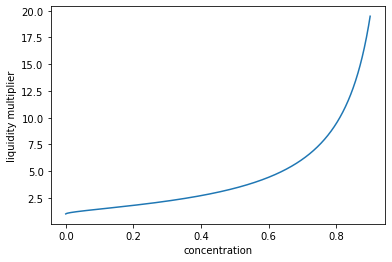

In [7]:
xs = np.linspace(0.0001,0.9,1000)
ys = [calculate_liquidity(1, x, 1/x) / 100 for x in xs]

fig = plt.figure()

plt.ylabel('liquidity multiplier')
plt.xlabel("concentration")

plt.plot(xs, ys)
plt.show()

스테이블 코인과 같이 가격 상관성이 높은 경우에는 0.99 ~ 1.01 범위 수준으로 좁힐 수도 있고, 이 경우 V2 DEX에 예치했을 때 대비 대략 200배 수준의 유동성이 생성됩니다. 

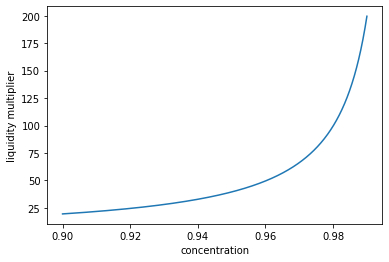

In [8]:
xs = np.linspace(0.9,0.99,1000)
ys = [calculate_liquidity(1, x, 1/x) / 100 for x in xs]

fig = plt.figure()

plt.ylabel('liquidity multiplier')
plt.xlabel("concentration")

plt.plot(xs, ys)
plt.show()

## 가격 변화에 따른 포지션의 자산 구성 변화

동일한 자산이더라도 유저의 가격 범위에 따라 서로 다른 유동성 크기를 반환하듯이, 생성된 포지션은 가격 범위에 따라 포지션의 자산 구성이 다르게 변화합니다. 좁힐수록 좀 더 크게 바뀌고, 넓힐수록 좀 더 적게 변화합니다.

#### 포지션에 예치되어 있는 토큰 갯수 계산

$$
X = (\frac{1}{\sqrt{P_c}} - \frac{1}{\sqrt{P_h}}) \cdot L \\
Y = (\sqrt{P_c} - \sqrt{P_l}) \cdot L \\
$$


* $P_c$ : 현재 두 토큰의 가격 ($P = \frac{Y}{X}$)
* $P_l$ : 포지션의 하방 가격선
* $P_h$ : 포지션의 상방 가격선
* $L$ : 포지션의 유동성 크기

In [9]:
def calculate_amount(p_c, p_l, p_h, lq=100):
    """ 범위에 따른 자산 갯수
    @param p_c 현재 가격
    @param p_l 포지션의 하방 가격선
    @param p_h 포지션의 상방 가격선
    @param lq  유동성 크기
    """
    
    if (p_c < p_h):
        X = 1/math.sqrt(p_c) - 1/math.sqrt(p_h)
    else:
        # 현재 가격이 포지션 범위를 초과할 경우, X의 갯수는 0 
        X = 0        
        Y = math.sqrt(p_h) - math.sqrt(p_l)
        return X * lq, Y * lq

    if (p_c > p_l):
        Y = (math.sqrt(p_c) - math.sqrt(p_l))
    else:
        # 현재 가격이 포지션 범위 밑으로 내려갈 경우, Y의 갯수는 0
        X = 1/math.sqrt(p_l) - 1/math.sqrt(p_h)
        Y = 0        
    return X * lq, Y * lq

V2 대비 V3 자산이 어떻게 변화하는지를 아래를 통해 시뮬레이션 해볼 수 있습니다. 

<IPython.core.display.Javascript object>


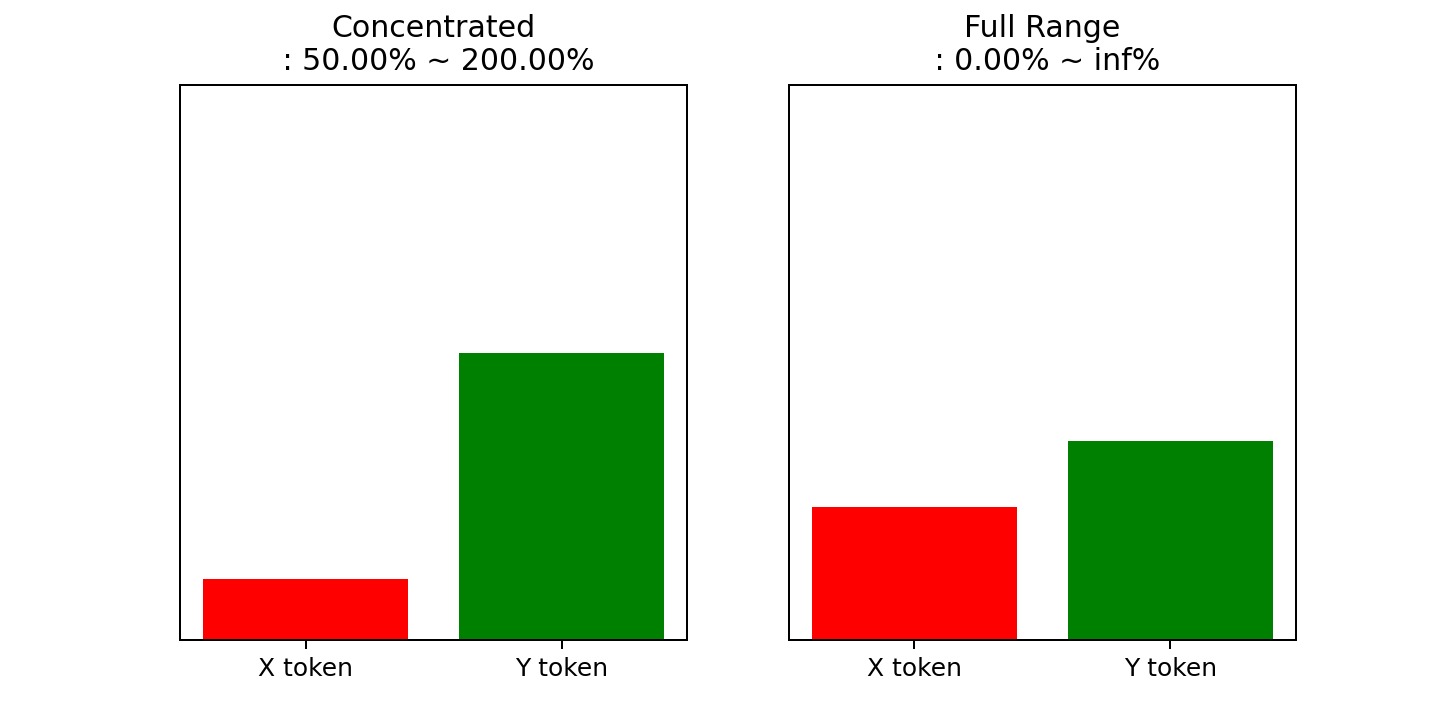

interactive(children=(FloatSlider(value=1.0, description='current', max=2.0, min=0.5), Output()), _dom_classes…

In [10]:
%matplotlib notebook
lower = 0.5
upper = 2.0

mid = np.sqrt(lower * upper)

fig = plt.figure(figsize=(8,4))
ax0 = fig.add_subplot(1, 2, 1)
ax0.set_title(f'Concentrated\n : {lower:.2%} ~ {upper:.2%}')
ax0.set_ylim(0,100)
ax0.set_yticks([])

concentrated = ax0.bar(
    ["X token", "Y token"], 
    height=calculate_amount(mid, lower, upper), 
    color=['r','g']
)

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title(f'Full Range\n : {0:.2%} ~ {np.inf:.2%}')
ax1.set_ylim(0,100)
ax1.set_yticks([])

full_range = ax1.bar(
    ["X token", "Y token"], 
    height=calculate_amount(mid, 0, np.inf, 100/liquidity_multiplier(mid, lower, upper)), 
    color=['r','g']
)

def update(current=widgets.FloatSlider(min=lower,max=upper,value=mid)):
    c_x, c_y = calculate_amount(current, lower, upper)
    f_x, f_y = calculate_amount(current, 0, np.infty, 100/liquidity_multiplier(mid, lower, upper))
    
    concentrated.get_children()[0].set_height(c_x)
    concentrated.get_children()[1].set_height(c_y)

    full_range.get_children()[0].set_height(f_x)
    full_range.get_children()[1].set_height(f_y)    

    fig.canvas.draw_idle()
    
widgets.interact(update)
plt.show()